## Final Project Submission

Please fill out:
* Student name: Alain Leukam
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


Flight delays are most of the time very frustrating to passengers and costly to airline companies. Flight delays are not easy to understand as they arise from multiple reasons like increase in air traffic at the origin or destination airport, weather etc. The arrival delay data of a few airline carrier could be useful to understand some  causes of flight delays.

The goal of this project is to construct a flight delay prediction model leveraging flight On-Time performance data and use the model for deriving insights about past flight delays. The on-time arrival data for non-stop domestic flights from US Department of Transportation(DoT) was used for this analysis.

The modeling approach involves using traditional & popular machine learning algorithms like Decision trees & Random Forest to predict airline delays. This notebook contains sections for dataset exploration, data cleansing, data visualizations, training and evaluation of classification models, and model interpretation. Common model evaluation metrics like sensitivity, specificity, ROC curves and accuracy scores were used for model evaluation.

In [1]:
#importing the libraries needed for our Project.
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Checking the data out
flights = pd.read_csv('flights.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
airlines = pd.read_csv('airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
YEAR                   1048575 non-null int64
MONTH                  1048575 non-null int64
DAY                    1048575 non-null int64
DAY_OF_WEEK            1048575 non-null int64
AIRLINE                1048575 non-null object
FLIGHT_NUMBER          1048575 non-null int64
TAIL_NUMBER            1040825 non-null object
ORIGIN_AIRPORT         1048575 non-null object
DESTINATION_AIRPORT    1048575 non-null object
SCHEDULED_DEPARTURE    1048575 non-null int64
DEPARTURE_TIME         1009060 non-null float64
DEPARTURE_DELAY        1009060 non-null float64
TAXI_OUT               1008346 non-null float64
WHEELS_OFF             1008346 non-null float64
SCHEDULED_TIME         1048573 non-null float64
ELAPSED_TIME           1005504 non-null float64
AIR_TIME               1005504 non-null float64
DISTANCE               1048575 non-null int64
WHEELS_ON              1007279 non-null f

In [5]:
flights.shape

(1048575, 31)

The data contains 1048575 row and 31 columns. 

In [6]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Just looking at the 5 first row of our data above, it is clear that we have a lot of missing data. We will have to do some cleaning and a few transformations before any visualization.

In [7]:
# Determining the percentage of missing values per cololumn
missing_values = flights.isna().sum()*100/flights.shape[0]
missing_values

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.739098
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          3.768448
DEPARTURE_DELAY         3.768448
TAXI_OUT                3.836540
WHEELS_OFF              3.836540
SCHEDULED_TIME          0.000191
ELAPSED_TIME            4.107575
AIR_TIME                4.107575
DISTANCE                0.000000
WHEELS_ON               3.938297
TAXI_IN                 3.938297
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            3.938297
ARRIVAL_DELAY           4.107575
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    96.135040
AIR_SYSTEM_DELAY       78.205851
SECURITY_DELAY         78.205851
AIRLINE_DELAY          78.205851
LATE_AIRCRAFT_DELAY    78.205851
WEATHER_DE

We have a lot of missing values in these 6 columns:CANCELLATION_REASON (96.135040%), AIR_SYSTEM_DELAY(78.205851%), SECURITY_DELAY (78.205851%), AIRLINE_DELAY (78.205851%), LATE_AIRCRAFT_DELAY(78.205851%), WEATHER_DELAY(78.205851%). We could be tempted to just delete those columns base on the facts that a column is missing more than 75% of its data. In this case we are trying to model the delays of the flights and the columns in question are somehow link to the delays. We will analyse each column separately and find a way to replace the missing values. 

In [8]:
flights['CANCELLATION_REASON'].value_counts()#Checking to see the diffents types of reason for cancellation.

B    28260
A     6974
C     5291
D        2
Name: CANCELLATION_REASON, dtype: int64

Using the code of federal regulation, reporting flight cancellation should use one of the letters A, B, C or D explained as: A - Airline/Carrier
    B - Weather
    C - National Air System
    D - Security
Giving the fact that the main cause of cancellation is the weather, this will also apply to the delays, we will be missing valuable data if we just delete this column. A, B, C and D are categorical values, we will manually replace them respectively with 1, 2, 3 and 4. The nan will be replace by 0.


In [9]:
# converting categoric value to numeric and NaN data to numeric zero
flights.loc[flights['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
flights.loc[flights['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
flights.loc[flights['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
flights.loc[flights['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4
flights['CANCELLATION_REASON'] = flights['CANCELLATION_REASON'].fillna(0)

In [10]:
flights['CANCELLATION_REASON'].value_counts()# Verifying

0    1008048
2      28260
1       6974
3       5291
4          2
Name: CANCELLATION_REASON, dtype: int64

After checking the value count for the remaining 5 columns: AIR_SYSTEM_DELAY(78.205851%), SECURITY_DELAY (78.205851%), AIRLINE_DELAY (78.205851%), LATE_AIRCRAFT_DELAY(78.205851%), WEATHER_DELAY(78.205851%, 0.0 is the dominant values and the null values represented by NaN may be due to the fact that the category in question did not actually cause any delay. We will therefore replace the NaNs in our 5 columns with 0.

In [11]:
flights['AIRLINE_DELAY'] = flights['AIRLINE_DELAY'].fillna(0)
flights['AIR_SYSTEM_DELAY'] = flights['AIR_SYSTEM_DELAY'].fillna(0)
flights['SECURITY_DELAY'] = flights['SECURITY_DELAY'].fillna(0)
flights['LATE_AIRCRAFT_DELAY'] = flights['LATE_AIRCRAFT_DELAY'].fillna(0)
flights['WEATHER_DELAY'] = flights['WEATHER_DELAY'].fillna(0)

In [12]:
#We will now drop all the remaining rows with NaN and still have enough data for our modeling
flights = flights.dropna(axis=0, how='any')
flights.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [13]:
flights.shape

(1005504, 31)

The data contains 1005504 row and 31 columns.

We will get the distribution of the delay by airline company. But first we must merge airlines with flights.

In [14]:
flights = flights.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.


In [15]:
# dropping old column and rename new one
flights = flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flights = flights.rename(columns={"AIRLINE_y":"AIRLINE"})

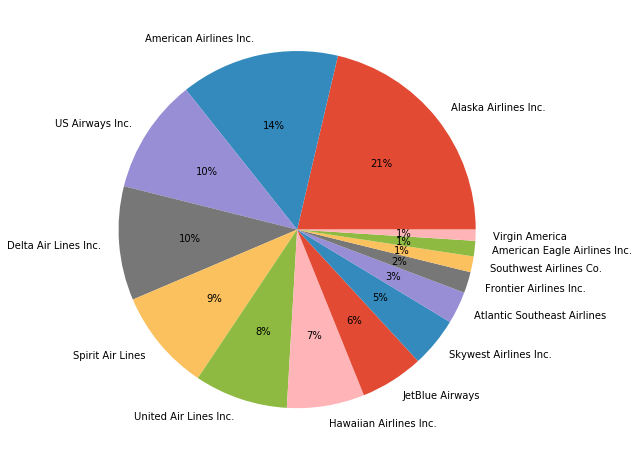

In [16]:
#Proportion of flights per Airline.
f, ax = plt.subplots(figsize=(8, 12))
quality=flights["AIRLINE"].unique()
size=flights["AIRLINE"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

Somehow, we are surprise by the result, Alasks Airline seem to have the higher portion of flights.

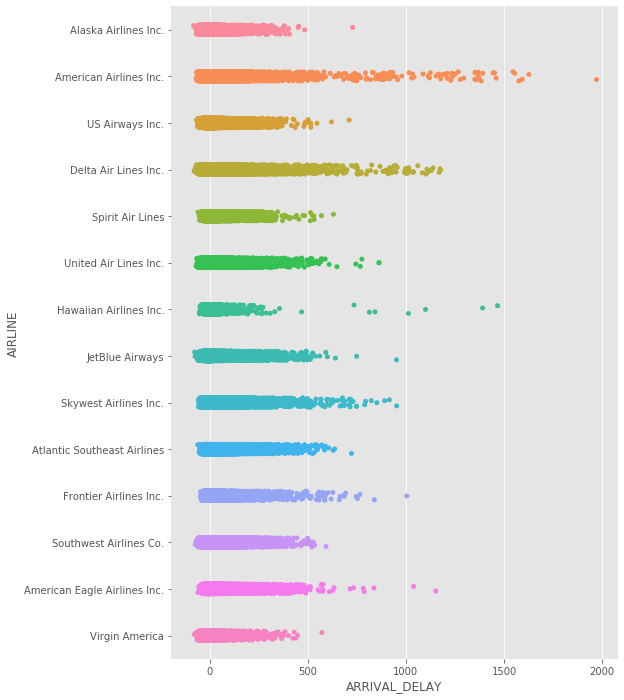

In [17]:
#Now let us check the number of delay by Airline.
f, ax = plt.subplots(figsize=(8, 12))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=flights, dodge=True, jitter=True
            )
plt.show()

American airline appears to have more delays than any other airline.

We will try to keep our model as simple as possible; we will considere that we have a flight delay when the 'ARRIVAL_DELAY' is greater than 0 and vice versa.

In [18]:
flights['DELAY'] = np.where(flights.ARRIVAL_DELAY >= 0, 1, 0)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0


In [19]:
#Checking the airline companies in the data.
flights['AIRLINE'].unique()

array(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'US Airways Inc.', 'Delta Air Lines Inc.', 'Spirit Air Lines',
       'United Air Lines Inc.', 'Hawaiian Airlines Inc.',
       'JetBlue Airways', 'Skywest Airlines Inc.',
       'Atlantic Southeast Airlines', 'Frontier Airlines Inc.',
       'Southwest Airlines Co.', 'American Eagle Airlines Inc.',
       'Virgin America'], dtype=object)

As per the instructor advise we will limit our model to three main US airlines: AA, UA and DL(American, United and Delta)

In [20]:
#We will start by slicing American Airline, Delta and United Airline data
data_3 = flights[flights['AIRLINE'].isin(['American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.'])]
data_3.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY
29311,2015,1,1,4,2336,N3KUAA,LAX,PBI,10,2.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29312,2015,1,1,4,258,N3HYAA,LAX,MIA,20,15.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29313,2015,1,1,4,1112,N3LAAA,SFO,DFW,30,19.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29314,2015,1,1,4,1674,N853AA,LAS,MIA,35,27.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29315,2015,1,1,4,371,N3GXAA,SEA,MIA,100,52.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1


In [21]:
data_3.shape

(322045, 32)

Our data now has 322045 rows and 30 columns.

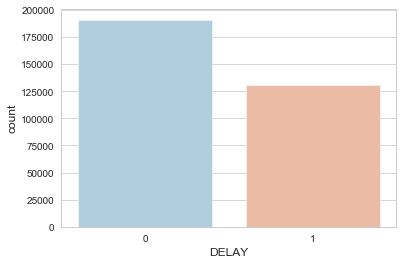

In [22]:
#Visualizing the number of delays versus the number of on time
sns.set_style('whitegrid')
sns.countplot(x='DELAY', data=data_3, palette='RdBu_r')

In [23]:
data_3.DELAY.value_counts()

0    191015
1    131030
Name: DELAY, dtype: int64

In [24]:
#percentage of flight that will be delayed based on our data which is also the baseline of our model.
print ("ratio = ", str( (131030*1.0) / (191015+131030) ))

ratio =  0.40686860531913244


The dataset is moderately asymmetric, with positive arrival delays making up 41% of the samples. This means that a classifier that predicts that there is no arrival delay has an accuracy of 59%.

In [25]:
# We will check to see the columns we have and plot must of them versus the ARRIVAL DELAY.
data_3.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'DELAY'],
      dtype='object')

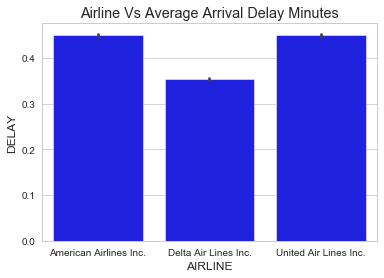

In [26]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(data_3['AIRLINE']))
sns.barplot(x='AIRLINE',y ='DELAY', data=data_3, color = "blue" , order = carrier_order)
fig = plt.title("Airline Vs Average Arrival Delay Minutes")

Delta Airline seems to have the shorter arrival delay. United and American airline have about the same level of arrival delays.

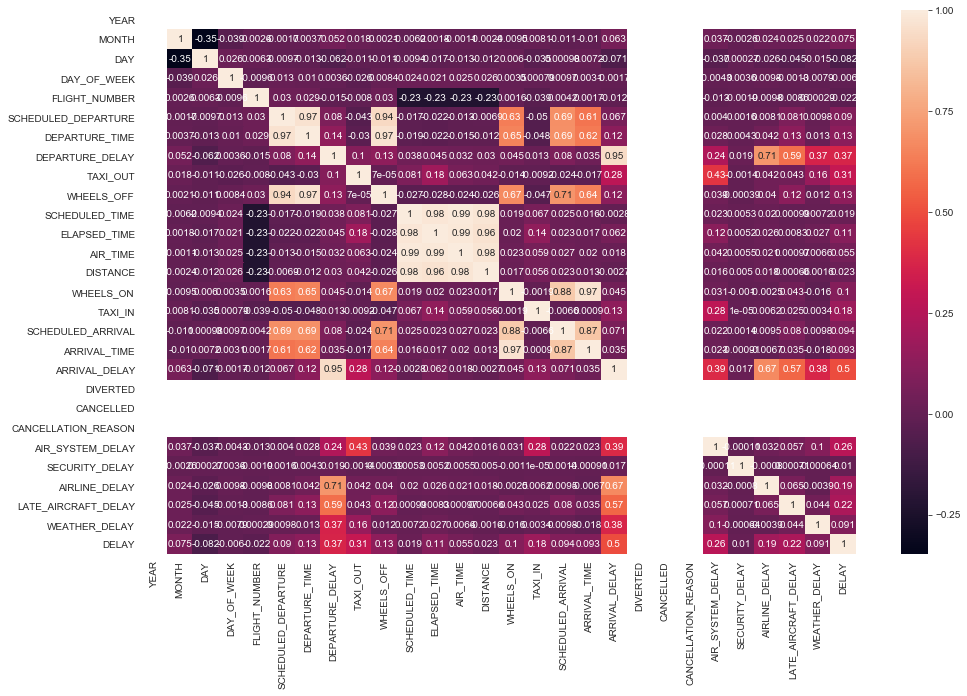

In [27]:
#Checking how correlated our features are
axis = plt.subplots(figsize=(16,10))
sns.heatmap(data_3.corr(),annot = True)
plt.show()

ARRIVAL_DELAY is correlated with these features in this order: DEPARTURE_DELAY(0.95), AIRLINE_DELAY(0.67), LATE_AIRCRAFT_DELAY(0.57), AIR_SYSTEM_DELAY(0.39).

In [28]:
data_3.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'DELAY'],
      dtype='object')

In [29]:


# Choosing the predictors base on the correlation table
few_features = [
    'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME']

# New dataframe based on a few features 
X_few = data_3[few_features]

In [30]:
#Label definition
y = data_3['DELAY']

In [31]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, random_state=42) 
clf.fit(X_few, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
importances=clf.feature_importances_
importances=pd.DataFrame([X_few.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,LATE_AIRCRAFT_DELAY,0.205425
1,AIRLINE_DELAY,0.384653
2,AIR_SYSTEM_DELAY,0.337434
3,WEATHER_DELAY,0.0448264
4,ELAPSED_TIME,0.0276622


AIRLINE_DELAY appears to have more influence on the flights delays: it was the lowest in our correlation list above . We will add more features running some model and see which of them has more influence on the flight delays.

In [33]:
# choosing the features
feature = [
    'YEAR'
    ,'MONTH'
    ,'DAY'
    ,'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME'
    ,'DEPARTURE_DELAY'
    ,'SCHEDULED_TIME'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'DAY_OF_WEEK'
    ,'SECURITY_DELAY'
]
import random
random.seed(0)
#To reduce the computation time, we will randomly select a sample of 50000 records 
X = data_3[feature]

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322045 entries, 29311 to 441107
Data columns (total 16 columns):
YEAR                   322045 non-null int64
MONTH                  322045 non-null int64
DAY                    322045 non-null int64
LATE_AIRCRAFT_DELAY    322045 non-null float64
AIRLINE_DELAY          322045 non-null float64
AIR_SYSTEM_DELAY       322045 non-null float64
WEATHER_DELAY          322045 non-null float64
ELAPSED_TIME           322045 non-null float64
DEPARTURE_DELAY        322045 non-null float64
SCHEDULED_TIME         322045 non-null float64
AIR_TIME               322045 non-null float64
DISTANCE               322045 non-null int64
TAXI_IN                322045 non-null float64
TAXI_OUT               322045 non-null float64
DAY_OF_WEEK            322045 non-null int64
SECURITY_DELAY         322045 non-null float64
dtypes: float64(11), int64(5)
memory usage: 51.8 MB


In [35]:
#Label definition
y = data_3['DELAY']

In [36]:
#We will split the record in two, the test and train data before we run the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40 )

In [37]:
#Scaling our data
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

In [38]:
model = LinearRegression()
model = model.fit(X_train, y_train)
slope = model.coef_
coef = model.intercept_
print(slope.flatten())
print(coef)

[ 0.00000000e+00  2.06586177e-03 -5.79871016e-03 -6.42801397e-01
 -8.72074349e-01 -3.44441445e-01 -4.61784546e-01 -1.39988667e+11
  1.40931205e+00 -2.31597816e+00  1.36715082e+11 -5.38156080e-02
  1.12993136e+10  1.72516525e+10  1.83722183e-03 -1.90929029e-02]
0.40726183468203087


In [39]:
y_pred = model.predict(X_test)

In [40]:
r2_score(y_test,y_pred)

-6.267284372767284e+17

The r2_score for linear regression is negative because the chosen model does not follow the trend of the data, so fits worse than a horizontal line.We will start with a "regular" tree as a baseline, the DecisionTreeClassifier

In [41]:
# Instantiate and fit a DecisionRegressor
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)





In [42]:
r2_score(y_test, y_pred)


0.7508867207674359

We have good value for our r2_score. let see what are the most important features.

In [43]:
importances=regressor.feature_importances_
importances=pd.DataFrame([X.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,YEAR,0
1,MONTH,0.00323306
2,DAY,0.0115939
3,LATE_AIRCRAFT_DELAY,3.26443e-05
4,AIRLINE_DELAY,0.00158376
5,AIR_SYSTEM_DELAY,0.104163
6,WEATHER_DELAY,4.06168e-05
7,ELAPSED_TIME,0.149046
8,DEPARTURE_DELAY,0.401124
9,SCHEDULED_TIME,0.194026


DEPARTURE_DELAY with 40% of the feature importance appears to carry a lot of weight in the reason why flights are delayed. The second most important feature is the scheduled time with 19% of the feature importance.

In [44]:
#Let us determine the number of entries from the column DEPARTURE_DELAY that are different from 0.
print("DEPARTURE_DELAY count: ")
print(data_3[data_3['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("All datarow count:")
print((data_3)['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("-------------------------------")
print("Percentag of DEPARTURE_DELAY that is not zero:")
print(data_3[data_3['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count() / data_3['DEPARTURE_DELAY'].count())

DEPARTURE_DELAY count: 
302428
-------------------------------
All datarow count:
322045
-------------------------------
-------------------------------
Percentag of DEPARTURE_DELAY that is not zero:
0.9390861525563198


In [45]:
# Instantiate a BaggingRegressor
bagged_tree =  BaggingRegressor(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [46]:
bagged_tree.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                

In [47]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.4175998277619098

In [48]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.42600972772956525

The two scores for bagged tree are really close to the portion of the flight delay we have anticipated in reality. Given the fact that the train and test score are close, we don't have an overfit situation.

In [49]:
# Instantiate and fit a RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
# Training accuracy score
forest.score(X_train, y_train)

0.539807976506691

In [51]:
# Test accuracy score
forest.score(X_test, y_test)

0.5472892250022116

The two scores for train and test for forest are close and has increased by almost 10%. We will probably apply the gridsearch to fine tune and see what parameters could get us even a better accuracy score. Prior to that let us see what are the most important features.

In [52]:
importances=forest.feature_importances_
importances=pd.DataFrame([X.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,YEAR,0
1,MONTH,0
2,DAY,0
3,LATE_AIRCRAFT_DELAY,0
4,AIRLINE_DELAY,0.00273312
5,AIR_SYSTEM_DELAY,0.192741
6,WEATHER_DELAY,0
7,ELAPSED_TIME,0.0022556
8,DEPARTURE_DELAY,0.687337
9,SCHEDULED_TIME,0.0129535


The departure delay is again the most important feature affecting our model by 68%

Out of the three model we tried, random forest is giving us the best score, we will fine tune this model and use it for our prediction model.

In [54]:

mean_forest_cv_score = np.mean(cross_val_score(forest, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_forest_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 53.94%


In [59]:
#We will randomly pick a few values for our parameter and do grid search from them for the best values:
forest_param_grid = {'n_estimators' : [10, 30, 100],
                 'max_depth' : [None, 2, 6, 10],
                 'min_samples_split' :[5, 10],
                 'min_samples_leaf' : [3, 6]
                }

In [61]:
forest_grid_search = GridSearchCV(forest, forest_param_grid, cv=3)
forest_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {forest_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {forest_grid_search.best_params_}")

Testing Accuracy: 86.46%

Optimal Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


The accuracy score has improved by 33% with the grid search. We didn't add 'entropy' or 'gini' as parameter because we were having an error message. we will run the model with them separately to see which one will be the best model

In [64]:
#Model with the optimal parameters 
forest = RandomForestRegressor( n_estimators=100, max_depth=None, min_samples_leaf=3, min_samples_split=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
# Optimal training accuracy score
forest.score(X_train, y_train)

0.9614480905014053

In [66]:
# Optimal test accuracy score
forest.score(X_test, y_test)

0.8882339624734275

Out of the three classifier tested, random forest gave us the best score, we will choose this classifier for our data prediction.

In [67]:
#Choosing the target for our data prediction
y = data_3['DELAY']
y = np.array(y)

In [68]:
#Choosing the predictors
X = np.array(X)

In [69]:
#We will split the record in two, the test and train data before we run the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40 )

In [70]:
#Determining the average delay of our data
y_average = data_3['ARRIVAL_DELAY'].agg('sum') / data_3['ARRIVAL_DELAY'].agg('count')

In [71]:
#Error on average delay for the test data
average_error = abs(y_average - y_test)
print('Average error: ', round(np.mean(average_error),2))

Average error:  5.16


In [72]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred = forest.predict(X_test)

In [74]:
#Calculate the absolute errors on our prediction
errors_pred = abs(y_pred - y_test)

In [75]:
#Mean of our predicted error
print('Mean Error predict: ', round(np.mean(errors_pred),3), 'minutes.')

Mean Error predict:  0.075 minutes.


This is a very small number compare to 5.16 minutes obtained above for average error. We may be in a situation of overfiting. The model will probably in this case predict the delay exactly most of the time.

In [77]:
#Let us check the feature importance of our model to see if we can mitigate the overfitting issue
X=pd.DataFrame(X)
importances=forest.feature_importances_
importances=pd.DataFrame([X.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,0.0,0.000000
1,1.0,0.002159
2,2.0,0.008794
3,3.0,0.000045
4,4.0,0.001956
5,5.0,0.108518
6,6.0,0.000010
7,7.0,0.142888
8,8.0,0.414081
9,9.0,0.190450


DEPARTURE_DELAY is really heavy in our model with 41% of the feature importance, the closer is SCHEDULED_TIME with 19%, then ELAPSED_TIME, AIR_SYSTEM_DELAY, TAXI_OUT, TAXI_IN, AIR_TIME with respectively: 14%, 11%, 5%, 3% and 3%. All the other features have less than 1% of weight on the model. Let us look at the percentage of DEPARTURE_DELAY in our model.

In [78]:
#Let us determine the number of entries from the column DEPARTURE_DELAY that are different from 0.
print("DEPARTURE_DELAY count: ")
print(data_3[data_3['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("All datarow count:")
print((data_3)['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("-------------------------------")
print("Percentag of DEPARTURE_DELAY that is not zero:")
print(data_3[data_3['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count() / data_3['DEPARTURE_DELAY'].count())

DEPARTURE_DELAY count: 
302428
-------------------------------
All datarow count:
322045
-------------------------------
-------------------------------
Percentag of DEPARTURE_DELAY that is not zero:
0.9390861525563198


Almost 94% of the values from DEPARTURE_DELAY are set with a value different from zero. The effects of the DEPARTURE_DELAY on the ARRIVAL_DELAY leads to the high weight of that feature importance on our model. So this seem normal to have such an accuracy in this case. Still, the accuracy is just too good, predicting the delay of a flight with an error plus or minus less than one minute. There is a need to check the accuracy of the model in a much better way. we will look at the coefficient of determination for both training data and testing data.

In [79]:
print("----------------- TRAINING ------------------------")
print("r-squared score: ",forest.score(X_train, y_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", forest.score(X_test, y_test))

----------------- TRAINING ------------------------
r-squared score:  0.9615677200746386
------------------- TEST --------------------------
r-squared score:  0.8887376010967306


We are clearly in a situation of overfitting due to DEPARTURE_DELAY. Let us considere a flight without DEPARTURE_DELAY and see how our model will perform

In [98]:
# Searching for flights without departure delay but with arrival delay
data_3nd = data_3[(data_3.loc[:,'DEPARTURE_DELAY'] < 0) & (data_3.loc[:,'ARRIVAL_DELAY'] > 15)].head(10)

In [99]:
data_3nd

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY
29367,2015,1,1,4,127,N3GHAA,IAD,DFW,625,622.0,...,0,0,0,17.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29382,2015,1,1,4,2476,N3LEAA,BDL,MIA,640,634.0,...,0,0,0,20.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29419,2015,1,1,4,1507,N3KXAA,SEA,DFW,700,656.0,...,0,0,0,24.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29498,2015,1,1,4,15,N783AA,JFK,SFO,800,755.0,...,0,0,0,48.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29510,2015,1,1,4,2287,N004AA,JAC,DFW,800,756.0,...,0,0,0,21.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29512,2015,1,1,4,2470,N5CAAA,DFW,BOS,800,756.0,...,0,0,0,21.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29529,2015,1,1,4,1475,N3JKAA,DFW,AUS,815,811.0,...,0,0,0,20.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29548,2015,1,1,4,903,N017AA,LAX,EGE,830,823.0,...,0,0,0,16.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29562,2015,1,1,4,2385,N467AA,DFW,JAX,840,833.0,...,0,0,0,34.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1
29587,2015,1,1,4,336,N479AA,ABQ,DFW,900,858.0,...,0,0,0,36.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1


In [100]:
# Look into a flight with Arrival Delay but no Departure Delay
data_3nd.iloc[1]

YEAR                                     2015
MONTH                                       1
DAY                                         1
DAY_OF_WEEK                                 4
FLIGHT_NUMBER                            2476
TAIL_NUMBER                            N3LEAA
ORIGIN_AIRPORT                            BDL
DESTINATION_AIRPORT                       MIA
SCHEDULED_DEPARTURE                       640
DEPARTURE_TIME                            634
DEPARTURE_DELAY                            -6
TAXI_OUT                                   13
WHEELS_OFF                                647
SCHEDULED_TIME                            206
ELAPSED_TIME                              232
AIR_TIME                                  164
DISTANCE                                 1194
WHEELS_ON                                 931
TAXI_IN                                    55
SCHEDULED_ARRIVAL                        1006
ARRIVAL_TIME                             1026
ARRIVAL_DELAY                     

The flight above left earlier but still have a delay. Let us use our model to see if this delay can be predicted.

In [108]:
#Data of a flight without departure delay
X2 = data_3nd.loc[:,feature]
X2 = X2.iloc[2]

In [109]:
# Setting the target for a flight without departure delay.
y2 =data_3nd.iloc[2]['ARRIVAL_DELAY']
print(y2)
X2

24.0


YEAR                   2015.0
MONTH                     1.0
DAY                       1.0
LATE_AIRCRAFT_DELAY       0.0
AIRLINE_DELAY             0.0
AIR_SYSTEM_DELAY         24.0
WEATHER_DELAY             0.0
ELAPSED_TIME            258.0
DEPARTURE_DELAY          -4.0
SCHEDULED_TIME          230.0
AIR_TIME                213.0
DISTANCE               1660.0
TAXI_IN                  33.0
TAXI_OUT                 12.0
DAY_OF_WEEK               4.0
SECURITY_DELAY            0.0
Name: 29419, dtype: float64

In [110]:
 #Printing the the results of our model for a flight without departure delay.
flight_pred = forest.predict([X2])
print("Predicted Delay of the Flight (Minutes): ", flight_pred)
print("-------------------------------------------------")
print("Original Delay of the Flight (Minutes):  ", y2)
print("_________________________________________________")
print("_________________________________________________")
print("Difference (Minutes)                   : ",  y2-flight_pred)

Predicted Delay of the Flight (Minutes):  [1.]
-------------------------------------------------
Original Delay of the Flight (Minutes):   24.0
_________________________________________________
_________________________________________________
Difference (Minutes)                   :  [23.]


In conclusion, without departure delay our model prediction dosn't have the same accuracy in preventing the arrival delay. Our predicted delay for this flight is more lower than the original delay. We must note that our model is based on three airlines. 
It is worth noting that we can use our model to compare historical delay amount airline companies and be able to advise customer on the best airlines to take if you want to avoid Arrival delay. For future work, we may study the impact of model where the departure delay is drop.